In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, make_scorer


In [2]:
# TRAER DATA
df= pd.read_csv(r'C:\Users\LENOVO\Documents\machine learning engineer\DMC\practica1\data\train.csv')
df_result=pd.read_csv(r'C:\Users\LENOVO\Documents\machine learning engineer\DMC\practica1\data\sample_submission.csv')

In [3]:
df_result.head(2)

,id,loan_status
0,58645,0.5
1,58646,0.5


In [4]:
df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0


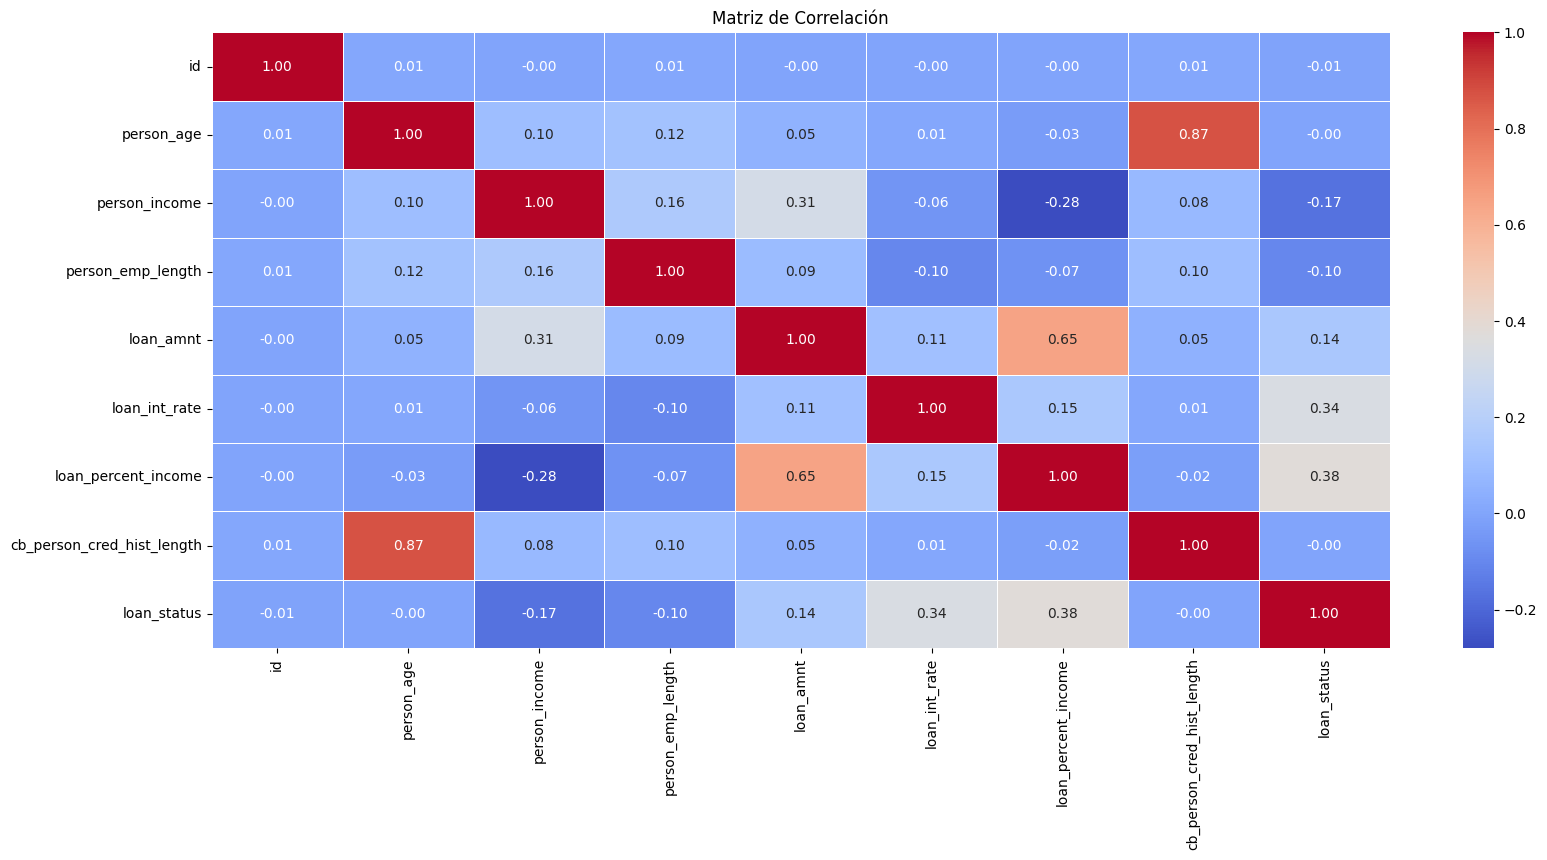

In [5]:
# Identificar las features numericas
features_numericas = df.select_dtypes(include=np.number).columns.tolist()

corr_matrix = df[features_numericas].corr()
# Visualiza la matriz de correlación
plt.figure(figsize=(19, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [8]:
def generar_histograma(df, columna, limite_x=None, bins=10):

    datos = df[columna].dropna()  # Elimina valores NaN
    plt.figure(figsize=(8, 3))
    
    # Crear histograma
    plt.hist(datos, bins=bins, edgecolor='black')
    
    # Establecer el límite del eje x si se proporciona
    if limite_x:
        plt.xlim(right=limite_x)
    
    # Etiquetas y título
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {columna}')
    
    # Mostrar el histograma
    plt.show()


def generar_grafico_barras(df, columna, limite_x=None):
    # Contar la frecuencia de cada categoría
    conteo = df[columna].value_counts()
    
    # Limitar el número de categorías si se especifica un límite
    if limite_x:
        conteo = conteo.head(limite_x)
    
    plt.figure(figsize=(10, 3))
    
    # Crear gráfico de barras
    conteo.plot(kind='bar', edgecolor='black')
    
    # Etiquetas y título
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'Gráfico de barras de {columna}')
    
    # Mostrar gráfico
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si es necesario
    plt.tight_layout()  # Ajustar diseño
    plt.show()

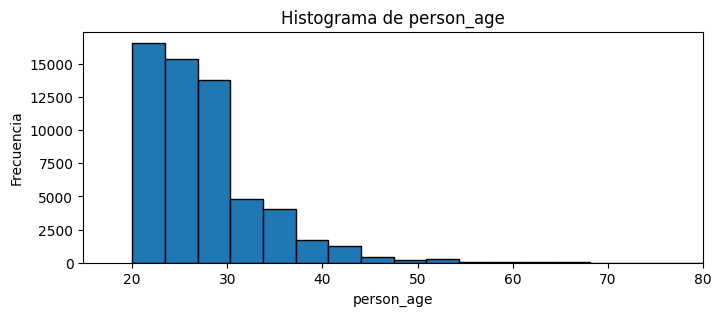

In [9]:
generar_histograma(df,'person_age',limite_x=80, bins=30)

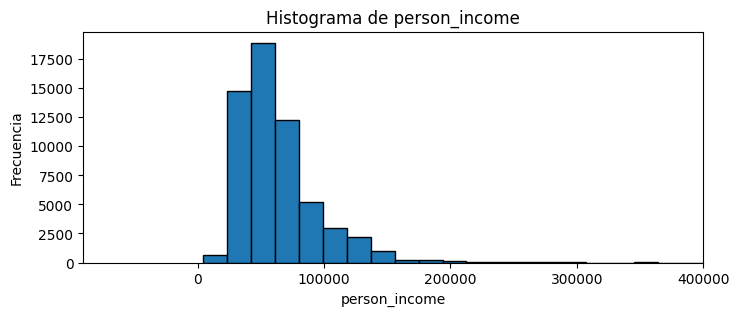

In [10]:
generar_histograma(df,'person_income',limite_x=400000,bins=100)

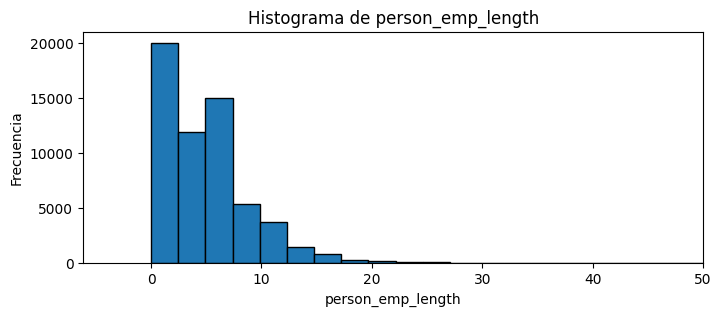

In [11]:
generar_histograma(df,'person_emp_length',limite_x=50,bins=50)

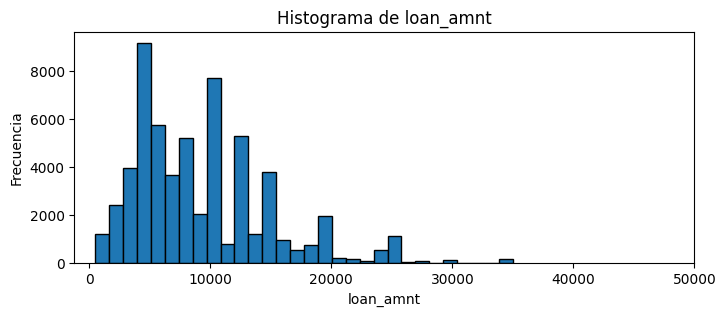

In [12]:
generar_histograma(df,'loan_amnt',limite_x=50000,bins=30)

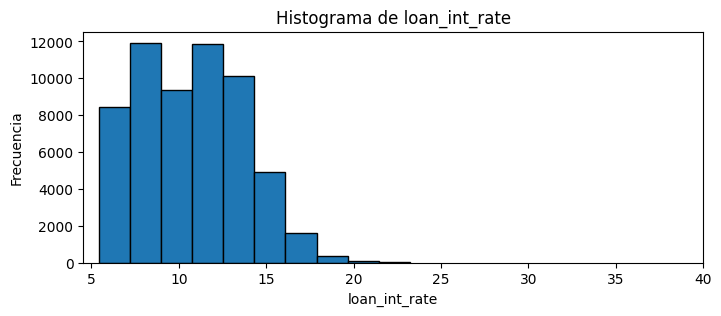

In [13]:
generar_histograma(df,'loan_int_rate',limite_x=40,bins=10)

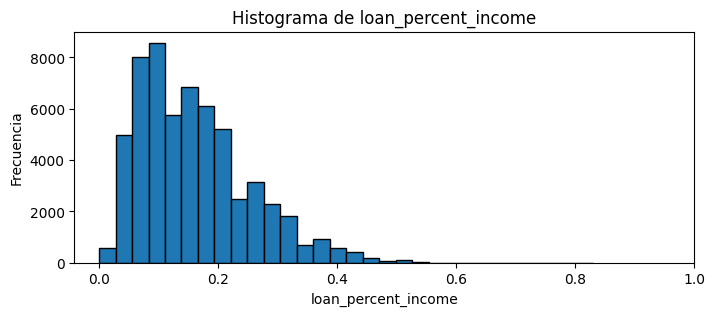

In [14]:
generar_histograma(df,'loan_percent_income',limite_x=1,bins=30)

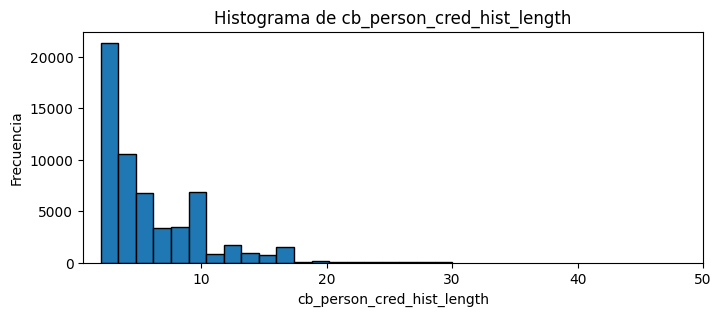

In [15]:
generar_histograma(df,'cb_person_cred_hist_length',limite_x=50,bins=20)

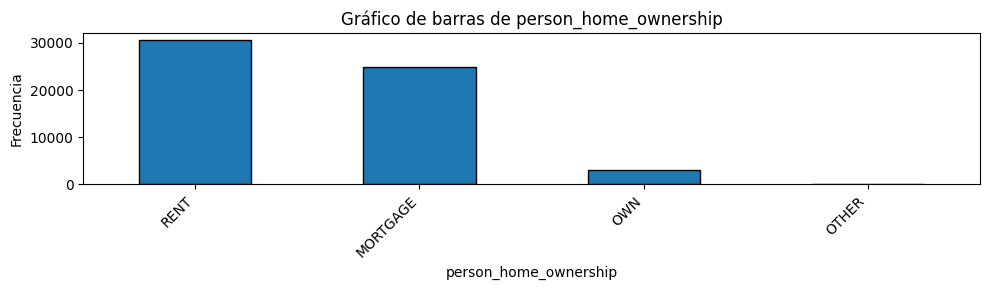

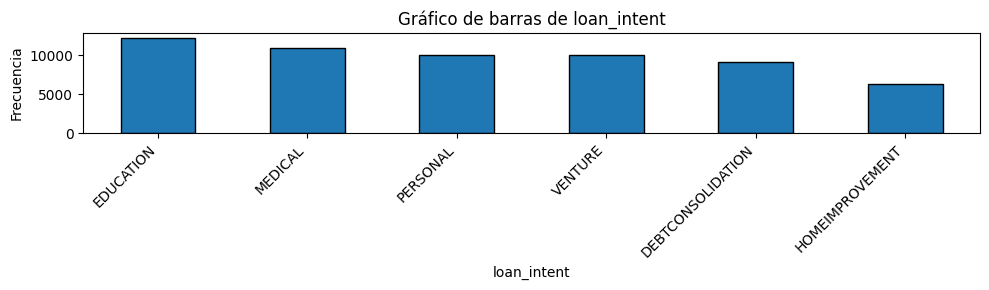

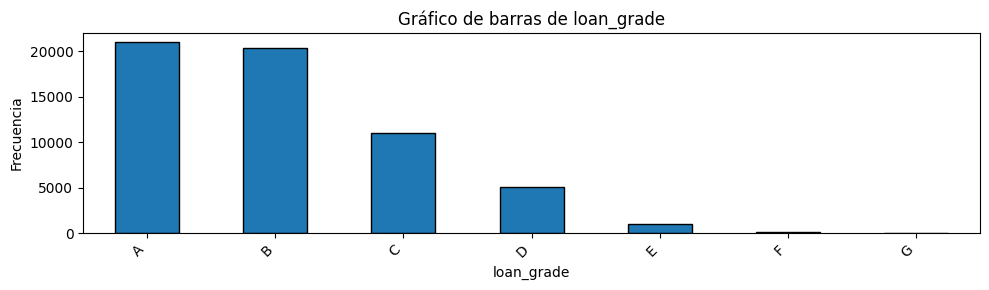

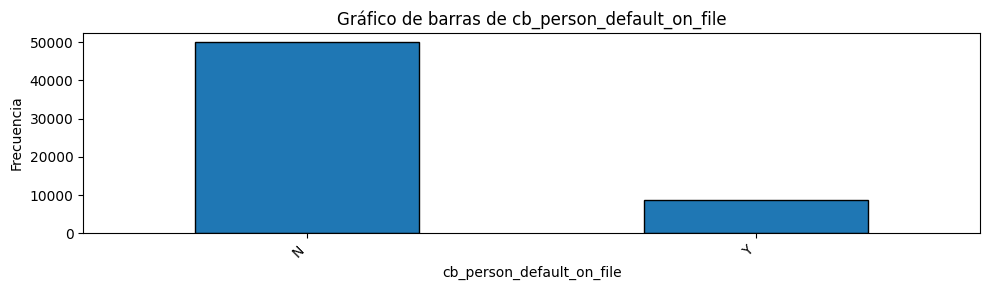

In [16]:
for i in ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']:
    generar_grafico_barras(df, i, limite_x=None)

In [17]:
# antes
df.shape

(58645, 13)

In [18]:
# limpieza de datos
df=df[(df['person_age'] >= 20) & (df['person_age'] <= 60)]
df=df[(df['person_income'] >= 0) & (df['person_income'] <= 300000)]
df=df[(df['person_emp_length'] >= 0) & (df['person_emp_length'] <= 30)]
df=df[(df['loan_amnt'] >= 0) & (df['loan_amnt'] <= 40000)]
df=df[(df['loan_int_rate'] >= 5) & (df['loan_int_rate'] <= 25)]
df=df.drop(['id'],axis=1)

df.shape

(58481, 12)

In [22]:
# ONE HOT ENCODING
data_ohe = pd.get_dummies(df, drop_first=True, dtype='int')
data_ohe.head()

# separar los el dataset
features =data_ohe.drop(['loan_status'],axis=1)
target = data_ohe['loan_status']

# escalado
numeric = df.drop(['loan_status'],axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler= StandardScaler()
scaler.fit(features[numeric])

features[numeric] = scaler.transform(features[numeric])

In [26]:
df['loan_status'].value_counts()

loan_status
0    50147
1     8334
Name: count, dtype: int64

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split

In [30]:
#ENTRENAR MODELO
# Definir el modelo
model = RandomForestClassifier(random_state=77)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [ 300,450,],           # Número de árboles
    'max_depth': [ 30,40],                 # Profundidad de los árboles
    # 'min_samples_split': [2, 5, 10],           # Mínimo número de muestras para dividir un nodo
    # 'min_samples_leaf': [1, 2, 4],          # Mínimo número de muestras en una hoja
}
# Definir las métricas para monitorear (f1 y roc_auc)
scoring = {
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# Configurar la búsqueda en grilla
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='roc_auc', cv=5, verbose=3, return_train_score=True)

# Entrenar el modelo con la mejor combinación de hiperparámetros
grid_search.fit(features, target)

# Guardar el mejor modelo entrenado
model = grid_search.best_estimator_

# Resultados de la mejor combinación de hiperparámetros
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END max_depth=30, n_estimators=300; f1: (train=1.000, test=0.797) roc_auc: (train=1.000, test=0.934) total time=  19.0s
[CV 2/5] END max_depth=30, n_estimators=300; f1: (train=1.000, test=0.799) roc_auc: (train=1.000, test=0.937) total time=  19.4s
[CV 3/5] END max_depth=30, n_estimators=300; f1: (train=1.000, test=0.802) roc_auc: (train=1.000, test=0.937) total time=  19.9s
[CV 4/5] END max_depth=30, n_estimators=300; f1: (train=1.000, test=0.818) roc_auc: (train=1.000, test=0.939) total time=  16.5s
[CV 5/5] END max_depth=30, n_estimators=300; f1: (train=1.000, test=0.809) roc_auc: (train=1.000, test=0.938) total time=  16.4s
[CV 1/5] END max_depth=30, n_estimators=450; f1: (train=1.000, test=0.796) roc_auc: (train=1.000, test=0.935) total time=  27.8s
[CV 2/5] END max_depth=30, n_estimators=450; f1: (train=1.000, test=0.800) roc_auc: (train=1.000, test=0.938) total time=  28.5s
[CV 3/5] END max_depth=30, n_estimato

In [31]:
# Métricas durante el entrenamiento (f1 y roc_auc) para cada combinación de hiperparámetros
results = grid_search.cv_results_

for i, params in enumerate(results['params']):
    print(f"\nCombination {i+1}: {params}")
    print(f"Mean F1 score (training): {results['mean_test_f1'][i]}")
    print(f"Mean ROC AUC score (training): {results['mean_test_roc_auc'][i]}")


Combination 1: {'max_depth': 30, 'n_estimators': 300}
Mean F1 score (training): 0.8049580413024419
Mean ROC AUC score (training): 0.9371553439389366

Combination 2: {'max_depth': 30, 'n_estimators': 450}
Mean F1 score (training): 0.8039292001018836
Mean ROC AUC score (training): 0.9376430413361613

Combination 3: {'max_depth': 40, 'n_estimators': 300}
Mean F1 score (training): 0.8032390037885074
Mean ROC AUC score (training): 0.9373246759234934

Combination 4: {'max_depth': 40, 'n_estimators': 450}
Mean F1 score (training): 0.8037594708857659
Mean ROC AUC score (training): 0.937753577774234


In [ ]:
model_rd= RandomForestClassifier(random_state=777, n_estimators=450 , max_depth= 40)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric

In [ ]:
df.head()

In [ ]:
df.info()